In [1]:
import numpy as np 
import pandas as pd 
import cv2
from matplotlib import pyplot as plt
import sys
import struct
import os
import functools
import math

def showImage(img):
    plt.figure(figsize=(15,15))
    plt.imshow(np.uint8(img),cmap='gray')
    plt.xticks([]),plt.yticks([])
    plt.show()
    
def zigZag(matrix):
    list = []

    rows= len(matrix)
    columns= len(matrix[0])
    
    solution=[[] for i in range(rows+columns-1)] 

    for i in range(rows): 
        for j in range(columns): 
            sum=i+j 
            if(sum%2 ==0): 

                #add at beginning 
                solution[sum].insert(0,matrix[i][j]) 
            else: 

                #add at end of the list 
                solution[sum].append(matrix[i][j]) 

    for i in solution: 
        for j in i: 
            list.append(j);

    return list

#Only for even squared Matrices
def reverseZigZag(list):
    n = int(math.sqrt(len(list)))
    matrix=[[0 for x in range(n)] for i in range(n)]
    k=0
    i=0
    j=0
    for k in range(0, len(list),1):
        change = False
        matrix[i][j] = list[k]
        if((i+j)%2 == 0):
            if(j < n-1):
                change = True
                j+=1
                if(i > 0):
                    i-=1        
            if(change == False):
                i+=1
        elif((i+j)%2 == 1):
            if(i<n-1):
                change = True
                i+=1
                if(j>0):
                    j-=1
            if(change ==  False):
                j+=1
    return matrix

In [2]:
class Node:
    def __init__(self, value, left, right):
        self.value = value
        self.left = left
        self.right = right
   
    def getLeft(self):
        return self.left
    
    def getRight(self):
        return self.right
    
    def getValue(self):
        return self.value  
    
    
class HuffmanEncoding:
    
    def __init__(self):
        self.d = {}
        
    def clearMess(self):
        self.d = {}
    
    def huffmanEncoding(self, data):
        freq = {}
        for element in data:
            if element in freq:
                freq[element] += 1
            else:
                freq[element] = 1
        freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
        tempFreq = freq.copy()
        while(len(tempFreq)>1):
            (key1,val1) = tempFreq[-1]
            (key2,val2) = tempFreq[-2]
            tempFreq = tempFreq[:-2]
            if(isinstance(key1, Node)):
                ent1 = key1
            else:
                ent1 = Node(key1, None, None)
            if(isinstance(key2, Node)):
                ent2 = key2
            else:
                ent2 = Node(key2, None, None)
            node = Node(None, ent1, ent2)
            tempFreq.append((node, val1+val2))
            tempFreq = sorted(tempFreq, key = lambda x: x[1], reverse = True)
        return node

    def generateCodes(self, node, s):
        if (node.left == None and node.right == None and node.value != None):
            self.d[node.value] = s
        if(node.left != None):
            s = s + '0'
            self.generateCodes(node.left, s)
            s = s[:-1]
        if(node.right != None):
            s = s + '1'
            self.generateCodes(node.right, s)
            s = s[:-1]
        return self.d
    
    def encodeData(self, data):
        tree = self.huffmanEncoding(data)
        codec = compress.generateCodes(tree, "")
        encoded_text = ""
        for element in data:
            encoded_text += self.d[element]
        return encoded_text
    
    def padEncodedData(self, encodedData):
        extra_padding = 8 - len(encodedData) % 8
        for i in range(extra_padding):
            encodedData += "0"
        padded_info = "{0:08b}".format(extra_padding)
        paddedEncodedData = padded_info + encodedData
        return paddedEncodedData
    
    def unpadEncodedData(self, padded_encoded_text):
        padded_info = padded_encoded_text[:8]
        extra_padding = int(padded_info, 2)
        padded_encoded_text = padded_encoded_text[8:] 
        encoded_text = padded_encoded_text[:-1*extra_padding]
        return encoded_text

    def decodeData(self, tree, encodedData):
        temp= []
        ref = huffmanTree
        for bit in inEncodedData:
            if(bit == '0'):
                ref = ref.left
            else:
                ref = ref.right
            if(ref.value != None):
                temp.append(ref.value)
        #         ref = copy.deepcopy(tree)
                ref = huffmanTree
        return temp
       
    
class FileStorage():

    def __init__(self):
        self.data = []
        self.index = 0
        
    def clearMess(self):
        self.data = []
        self.index = 0
        
    def serialize(self, node):
        if(node.value == None):
            self.data.append('#')
            self.serialize(node.left)
            self.serialize(node.right)
        else:
            self.data.append(node.value)
        return self.data
    
    def deserialize(self, list):
        if(list[self.index] == '#'):
            node = Node(None, None, None)
            self.index += 1
            node.left = self.deserialize(list)
            node.right = self.deserialize(list)   
        else:
            node = Node(list[self.index], None, None)
            self.index += 1
        return node
    
    def printTree(self, node):
        if(node.value == None):
            print(None)
            self.printTree(node.left)
            self.printTree(node.right)
        else:
            print(node.value)
    
    def storeTreeInFile(self, outfile, serializedTree):
        #Storing Tree length in file
        sizeArray = struct.pack('Q', len(serializedTree))
        outfile.write(sizeArray)
        outfile.write(bytes('*', 'utf8')) #To create seperation between Size and content
        #Storing Tree Data
        for ii in serializedTree:
            if isinstance(ii, str):
                outfile.write(bytes(ii, 'utf8'))
            else:
                byte = struct.pack('f', ii)
                outfile.write(byte)
        outfile.write(bytes('*', 'utf-8'))
        return outfile
        
    def storeDataInFile(self, outfile, padded_encoded_text):
        data = bytearray()
        for i in range(0, len(padded_encoded_text), 8):
            byte = padded_encoded_text[i:i+8]
            data.append(int(byte, 2))
            
        sizeArray = struct.pack('Q', len(bytes(data)))
        outfile.write(sizeArray)
        outfile.write(bytes('*', 'utf8')) #To create seperation between Size and content
        
        outfile.write(bytes(data))
        return outfile
    
    def fetchTreeFromFile(self, infile):
        #Reading Size of tree
        print("Inside Tree", infile.tell())
        sizeArray = infile.read(8)
        size = struct.unpack('Q',sizeArray)[0]
        byte = infile.read(1)

        treeArray = []
        last_pos = 0
        byte = infile.read(1)
        if byte == b'#':
            treeArray.append(byte.decode('utf8'))
        else:
            infile.seek(last_pos)
            byte = infile.read(4)
            byte = struct.unpack('f', byte)[0]
            print(byte)
            treeArray.append(byte)
        while True:
            last_pos = infile.tell()
            byte = infile.read(1)
            if byte == b'*':
                break
            elif byte == b'#':
                treeArray.append(byte.decode('utf8'))        
            else:
                if len(treeArray) == size: # <-- Need to fix this
                    break
                infile.seek(last_pos)
                byte = infile.read(4)
                byte = struct.unpack('f', byte)[0]
                treeArray.append(byte)
        return treeArray, infile
    
    def fetchDataFromFile(self, infile):
        sizeArray = infile.read(8)
        
        size = struct.unpack('Q',sizeArray)[0]
        print("In Fetch Data function Size fetched", size)
        byte = infile.read(1)
        bitString = ""
        byte = infile.read(1)
        count = 1
        while(count <= size): 
            byte = ord(byte)
            bits = bin(byte)[2:].rjust(8, '0')
            bitString += bits
            byte = infile.read(1)
            count += 1
        print("In Fetch Data function count, size", count,size)
        infile.seek(infile.tell()-1)
        return bitString, infile
    
    def storeNumber(self, outfile ,num):
        dataArray = struct.pack('Q', num)
        outfile.write(dataArray)
        return outfile
        
    def fetchNumber(self, infile):
        dataArray = infile.read(8)
        number = struct.unpack('Q', dataArray)[0]
        return number, infile

In [3]:
def selectQMatrix(qName):
    Q10 = np.array([[80,60,50,80,120,200,255,255],
                [55,60,70,95,130,255,255,255],
                [70,65,80,120,200,255,255,255],
                [70,85,110,145,255,255,255,255],
                [90,110,185,255,255,255,255,255],
                [120,175,255,255,255,255,255,255],
                [245,255,255,255,255,255,255,255],
                [255,255,255,255,255,255,255,255]])

    Q50 = np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,130,99]])

    Q90 = np.array([[3,2,2,3,5,8,10,12],
                    [2,2,3,4,5,12,12,11],
                    [3,3,3,5,8,11,14,11],
                    [3,3,4,6,10,17,16,12],
                    [4,4,7,11,14,22,21,15],
                    [5,7,11,13,16,12,23,18],
                    [10,13,16,17,21,24,24,21],
                    [14,18,19,20,22,20,20,20]])
    if qName == "Q10":
        return Q10
    elif qName == "Q50":
        return Q50
    elif qName == "Q90":
        return Q90
    else:
        return np.ones((8,8)) #it suppose to return original image back

1920
1080
1920
1080


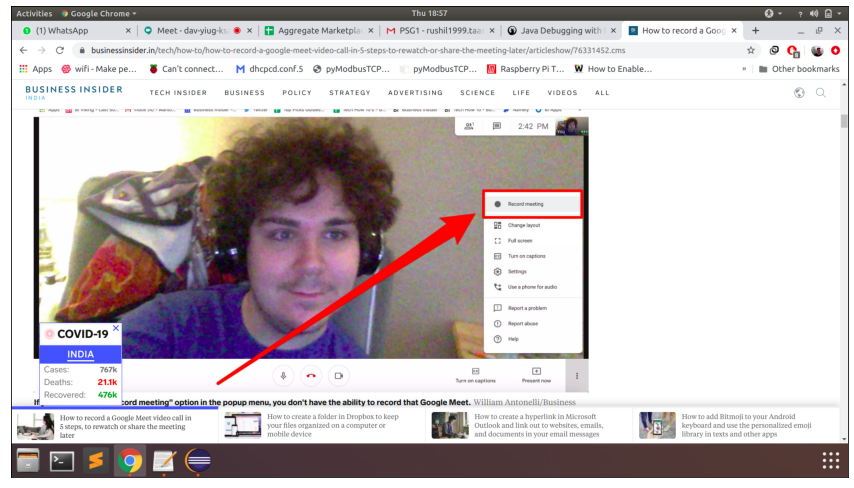

In [4]:
from PIL import Image
from resizeimage import resizeimage
block = 8

with open('test3.png', 'r+b') as f:
    with Image.open(f) as image:
        height, width = image.size
        print(height)
        print(width)
        newHeight = height - (height%block)
        newWidth = width - (width%block)
        print(newHeight)
        print(newWidth)
        img = resizeimage.resize_cover(image, [newHeight, newWidth])


img = np.array(img)
# img = cv2.imread('lenna.png')
img = img[:, :, [0, 1, 2]]
showImage(img)

In [5]:
height  = len(img) #one column of image
width = len(img[0]) # one row of image
sliced = [] # new list for 8x8 sliced image 

block = 8

npImg = np.array(img);
# print(img[:,:,0]);

#print(height)
# print(width)

print("Dimensions of image:")
dimensions = img.shape[2]
print(img.shape)
print("Dimensions ", dimensions)
# print(img)


Dimensions of image:
(1080, 1920, 3)
Dimensions  3


In [6]:
sliced = []
temp = []

#For each z dimension
for k in range(0,dimensions,1):
    temp = []
    index = 0
    currY = 0 #current Y index
    for i in range(block,height+1,block):
        currX = 0 #current X index
        for j in range(block,width+1,block):
            
            #Making blocks of 2x2 from the matrix
            temp.append(img[currY:i, currX:j, k] - np.ones((block,block))*128) #appending blocks to a temporary array
            currX = j
        currY = i        
    sliced.append(temp) #Appending temporary array to final array

In [7]:
dctSliced = []
for k in range(0,dimensions,1):
    temp = []
    for x in sliced[k]:
        dctx = cv2.dct(x)
        y = cv2.idct(dctx)
        #print(x)
        #print("gap")
        #print(dctx)
        temp.append(dctx)
    dctSliced.append(temp)
# print(dctSliced[0][0])

In [8]:
selectedQMatrix = selectQMatrix("Q90")
quantizationNumber = 90 #User Input
quantSliced = []
# print(selectedQMatrix)
for k in range(0,dimensions,1):
    temp = []
    for x in dctSliced[k]:
        #print(x)
        x = np.round(x/selectedQMatrix)
        #print("gap")
        #print(x)
        temp.append(x)
        #print(x)
    quantSliced.append(temp)
print(quantSliced[2])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
zigZagSliced = []
temp = []

for k in range(0,dimensions,1):
    temp = []
    for x in quantSliced[k]:
        zList = zigZag(x)
#         print(zList)
        temp.append(zList)
    zigZagSliced.append(temp)
# print(zigZagSliced[0][0])

In [10]:
huffSliced = []

temp = []

for k in range(0,dimensions,1):
    temp = []
    huffList = []
    for x in zigZagSliced[k]:
        temp = temp + x
    huffSliced.append(temp)
# print(huffSliced[0][0])

KeyboardInterrupt: 

In [ ]:
#Storing meta data
filename =  "/home/rushil/Documents/Python/Image Processing/Compression/ci.bin"
outfile = open(filename,'wb')
memory = FileStorage()


outfile = memory.storeNumber(outfile, block)
outfile = memory.storeNumber(outfile, dimensions)
outfile = memory.storeNumber(outfile, height)
outfile = memory.storeNumber(outfile, width)
outfile = memory.storeNumber(outfile, quantizationNumber)


In [ ]:
#Storing Compressed Image
compress = HuffmanEncoding()
for k in range(0,dimensions,1):
    
    compress.clearMess()
    
    encodedData = compress.encodeData(huffSliced[k])
    padded_encoded_text = compress.padEncodedData(encodedData)

    if(len(padded_encoded_text) % 8 != 0):
        print("Encoded text not padded properly")
    tree = compress.huffmanEncoding(huffSliced[k])

    memory.clearMess()
    serializedTree = memory.serialize(tree)
    
    #Adding Tree to File
    outfile = memory.storeTreeInFile(outfile, serializedTree)
    
    #Adding Data to File 
    outfile = memory.storeDataInFile(outfile, padded_encoded_text)
    
outfile.close()



In [ ]:
####### END ##########

In [ ]:
# memory = FileStorage()
# decompress = HuffmanEncoding()

# origData = []
# filename =  "/home/rushil/Documents/Python/Image Processing/Compression/ci.bin"


# infile = open(filename, "rb")

# for i in range(0,3,1):
#     memory.clearMess()
#     decompress.clearMess()

#     inTree, infile = memory.fetchTreeFromFile(infile)
    
#     paddedData, infile = memory.fetchDataFromFile(infile)

#     inEncodedData = decompress.unpadEncodedData(paddedData)

#     huffmanTree = memory.deserialize(inTree)
    
#     temp = decompress.decodeData(huffmanTree, inEncodedData)
    
#     origData.append(temp)
    
#     if functools.reduce(lambda i, j : i and j, map(lambda m, k: m == k, origData[i], huffSliced[i]), True) :  
#         print ("The lists are identical") 
#     else : 

#         print ("The lists are not identical") 
    


In [ ]:
# if(paddedData == padded_encoded_text):
#     print("Yes")
# else:
#     print("No")
    
# if(inTree == serializedTree):
#     print("Yes")
# else:
#     print("No")

In [ ]:
# memory.printTree(huffmanTree)

In [ ]:
# memory.printTree(tree)

In [ ]:
#huffSliced is a list consisting of 3 lists for 3 dimensions. Each list having 4096 elements.
#The 8x8 matrix lists have been merged and appended to each of the above lists.

# encodedData = []
# compress = HuffmanEncoding()

# encodedData = compress.encodeData(huffSliced[0])
# print(encodedData)



In [ ]:
#Padding Encoded Data
# padded_encoded_text = compress.padEncodedData(encodedData)

# if(len(padded_encoded_text) % 8 != 0):
#     print("Encoded text not padded properly")
    
# #Converting data into Byte Array
# data = bytearray()
# for i in range(0, len(padded_encoded_text), 8):
#     byte = padded_encoded_text[i:i+8]
#     data.append(int(byte, 2))

# print(data)


In [ ]:
# memory = FileStorage()
# tree = compress.huffmanEncoding(huffSliced[0])

# serializedTree = memory.serialize(tree)
# print(len(serializedTree))

In [ ]:
# filename =  "ci.bin"
# outfile = open(filename,'wb')

# #Adding Tree to File
# outfile = memory.storeTreeInFile(outfile, serializedTree)

In [ ]:
#Adding Data to File 
# outfile = memory.storeDataInFile(outfile, data)

In [ ]:
# origData = []

# # ref = copy.deepcopy(tree)
# ref = huffmanTree

# for bit in encodedData:
#     if(bit == '0'):
#         ref = ref.left
#     else:
#         ref = ref.right
#     if(ref.value != None):
#         origData.append(ref.value)
# #         ref = copy.deepcopy(tree)
#         ref = huffmanTree

# # print(origData)


# if functools.reduce(lambda i, j : i and j, map(lambda m, k: m == k, origData, huffSliced[0]), True) :  
#     print ("The lists are identical") 
# else : 

#     print ("The lists are not identical") 

In [ ]:
# print(len(quantSliced[0]))

In [ ]:
# m = n = 0
# cnt1 = cnt2 = 0
# reconSliced = []
# compressedImg = np.ones((len(img[:,:,0]),len(img[:,:,0][0])))
# for i in range(0, len(origData), block*block):
#     temp = reverseZigZag(origData[i:i+64])
#     reconSliced.append(temp)

In [ ]:
# print(quantSliced[0][1])
# temp = reverseZigZag(origData[64:128])
# print(temp)
# print(temp == quantSliced[0][1])

In [ ]:

# compressedImg = np.ones((len(img[:,:,0]),len(img[:,:,0][0])))
# index = 0
# currY = 0 #current Y index
# for i in range(block,height+1,block):
#     currX = 0 #current X index
#     for j in range(block,width+1,block):
#         compressedImg[currY:i, currX:j] = reverseZigZag(origData[index:index+64]);
#         index = index+64
#         currX = j
#     currY = i

# print(len(quantSliced[0]))
# print("END!!!")
# print(len(compressedImg))

# if functools.reduce(lambda i, j : i and j, map(lambda m, k: m == k, quantSliced[0], compressedImg), True) :  
#     print ("The lists are identical") 
# else : 

#     print ("The lists are not identical") 

In [ ]:
# import functools
# infile = open(filename, "rb")
# out = []
# last_pos = 0
# byte = infile.read(1)
# if byte == b'#':
#     out.append(byte.decode('utf8'))
# else:
#     infile.seek(last_pos)
#     byte = infile.read(4)
#     byte = struct.unpack('f', byte)
#     out.append(byte)
    
# while True:
    
#     last_pos = infile.tell()
#     byte = infile.read(1)
    
#     if byte == b'*':
#         break
#     elif byte == b'#':
#         out.append(byte.decode('utf8'))        
#     else:
# #         print(len(out))
# # Need to store tree size as well.....
#         if len(out) == len(serializedTree):
#             break
#         infile.seek(last_pos)
#         byte = infile.read(4)
#         byte = struct.unpack('f', byte)
#         out.append(byte)
        
# print(out)


# # if functools.reduce(lambda i, j : i and j, map(lambda m, k: m == k, out, serializedTree), True) :  
# #     print ("The lists are identical") 
# # else : 
# #     print ("The lists are not identical") 

In [ ]:
# bitString = ""
# byte = infile.read(1)
# while(byte != b''):
#     byte = ord(byte)
#     bits = bin(byte)[2:].rjust(8, '0')
#     bitString += bits
#     byte = infile.read(1)
    
# print(bitString)

# if functools.reduce(lambda i, j : i and j, map(lambda m, k: m == k, bitString, padded_encoded_text), True) :  
#     print ("The lists are identical") 
# else : 
#     print ("The lists are not identical") 

In [ ]:
# infile = open(filename, 'rb')

# inTree = []

# byte = infile.read(1)
# byte = byte.decode('utf8')
# inTree.append(byte)
# while(byte != '*'):
#     byte = infile.read(1)
#     byte = byte.decode('utf8')
#     inTree.append(byte)

# print(inTree)

In [ ]:

# bitString = ""
# byte = infile.read(1)
# while(byte != b''):
#     byte = ord(byte)
#     bits = bin(byte)[2:].rjust(8, '0')
#     bitString += bits
#     byte = infile.read(1)
    
# print(bitString)

In [ ]:
# bitString = padded_encoded_text

# padded_info = padded_encoded_text[:8]
# extra_padding = int(padded_info, 2)

# padded_encoded_text = padded_encoded_text[8:] 
# encoded_text = padded_encoded_text[:-1*extra_padding]

# print(encoded_text)

In [ ]:
# import functools

# #Need to store tree in the file as well
# tree = compress.huffmanEncoding(huffSliced[0])

# origData = []

# ref = tree


# for bit in encoded_text:
#     if(bit == '0'):
#         ref = ref.left
#     else:
#         ref = ref.right
#     if(ref.value != None):
#         origData.append(ref.value)
#         ref = tree

# # print(origData)


# if functools.reduce(lambda i, j : i and j, map(lambda m, k: m == k, huffSliced[0], origData), True) :  
#     print ("The lists are identical") 
# else : 
#     print ("The lists are not identical") 

In [ ]:
#Storing files, not succedded yet

#Store files in this cell

#huffSlice is a list consisting of 3 lists(for 3 dimensions) and each list has 4096(number subjective to image dimensions) elements 
#Each of these 4096 elements in all the 3 lists are itself lists having another list of symbols and dictionary
#Try storing these...

# filename = '/home/rushil/Documents/Academics/Image Processing/Image Processing/ci'
# outfile = open(filename,'w')

# for k in range(0,3,1):
#     temp = []
#     temp = huffSliced[k]
#     print(len(temp))
#     for i in temp:
#         huffList = i
#         print(huffList[0])
#         str = ""
#         for j in huffList[0]:
# #             print(type(j))
#             str = str + j
#         print(str)
#         outfile.write(str)
            
# outfile.close()     








# import json


# filename = '/home/rushil/Documents/Academics/Image Processing/Image Processing/ci'
# outfile = open(filename,'w')
# json.dump(huffSliced,outfile)
# outfile.close()


In [ ]:

#Of no use....

# npCompImg =np.zeros((len(img[:,:,0]),len(img[:,:,0][0]), 3) )


# for k in range(0,3,1):
#     compressedImg = np.ones((len(img[:,:,0]),len(img[:,:,0][0])))
    
#     index = 0
#     currY = 0 #current Y index
#     for i in range(block,height+1,block):
#         currX = 0 #current X index
#         for j in range(block,width+1,block):
#             compressedImg[currY:i, currX:j] = quantSliced[k][index]
#             index = index+1
#             currX = j
#         currY = i
#     npCompImg[:,:,k] = compressedImg

# print(npCompImg[0][0])




# print("Compressed")
# showImage(npCompImg)







# # cv2.imwrite('/home/rushil/Documents/Academics/Image Processing/Image Processing/compressedlenna.png',npCompImg)

# # print("Original")
# # showImage(img)

# import pickle


# filename = '/home/rushil/Documents/Academics/Image Processing/Image Processing/ci'
# outfile = open(filename,'wb')
# pickle.dump(npCompImg,outfile)
# outfile.close()





In [ ]:

#Of no use as of right now ....just store files for time being.....
# for k in range(0,3,1):
#     index = 0
#     currY = 0 #current Y index
#     for i in range(block,height+1,block):
#         currX = 0 #current X index
#         for j in range(block,width+1,block):
#             tempMat = npCompImg[currY:i, currX:j,k]
#             print(tempMat)
#             index = index+1
#             currX = j
#         currY = i

